
# <span style='color:midnightblue'> Python para Actuarios Vida  </span>

![ADRISK](Imagenes/KN.png)


## <span style='color:midnightblue'> Sesión 05: Renta vitalicias y   seguros de vida (Parte 02)  </span>

###  Un seguro de vida simple 
- El producto se vende a $(x)$ en el momento 0.
![](imagenes/01.png)

#### VPE 
Valor Presente Esperado:
![](imagenes/02.png)
![](imagenes/03.png)

### Caso 01
Calcular $_{5∣1}A_{65} = 1*v(6)*_{5∣}q_{65} = 1*v(6)*_{5}p_{65}*q_{70}$ con tasa i = 3%

In [11]:
import pandas as pd
import numpy as np

life_table = pd.read_excel("life_table.xlsx",engine='openpyxl') 
life_table

,age,qx,lx,ex,dx
0,0,0.00382,100000,77.95,382
1,1,0.00047,99618,77.25,47
2,2,0.00019,99572,76.28,19
3,3,0.00015,99552,75.30,15
4,4,0.00013,99538,74.31,13
...,...,...,...,...,...
106,106,0.52076,15,1.38,8
107,107,0.53591,7,1.33,4
108,108,0.54984,3,1.29,2
109,109,0.56257,2,1.26,1


In [12]:
qx = life_table.qx
px = 1- qx
kpx = np.prod(px[65:69+1])            
kpx  

0.9145881430551792

In [13]:
kqx = kpx*qx[70]
kqx

0.020907484950241396

In [14]:
# Discount factor
discount_factor = (1 + 0.03) **- 6
discount_factor

0.8374842566836542

In [15]:
# EPV of the simple life insurance 
EPV = 1*discount_factor *kqx
EPV


0.017509689492677602

### Caso 02
 producto vendido a $(20)$ que paga 10,000 PEN si la muerte ocurre a una edad determinada de 30 
           

In [16]:
# 10-year survival probability of (20) 
kpx = np.prod(px[(20):(30)])
kpx


0.9930617032944541

In [17]:
# 10-year deferred mortality probability of (20) 
kqx = kpx * qx[30]
kqx


# Discount factor
discount_factor = (1 + 0.01)** - 11
discount_factor


# EPV of the simple life insurance
10000 * discount_factor * kqx

6.853806633685155

## Seguro de vida total, temporal y diferida

#### Una serie de contratos de un año


![](imagenes/02.png)

¿Y si?   
- ¿El beneficio es $b_{k}$ en lugar de 1 ?
- ¿Una serie de contratos de un año en lugar de uno solo?

###  Estructura general

Una renta vitalicia en $(x)$ con vector de beneficio por muerte:   

- $(b_{0}, b_{1},…,b_{k},…)$   

Serie de contratos de un año:    
- cada una con $b_{k}⋅v(k+1)⋅_{k}p_{x}⋅q_{x+k}$ como valor presente esperado (EPV)   

juntos :   

-  $\sum_{k=0}^{\infty} b_{k}⋅v(k+1)⋅_{k}p_{x}⋅q_{x+k}$ es el EPV.
# 

### Seguro de vida total
Seguro de vida entero: de por vida.
![](imagenes/04.png)

### Seguro de vida temporal
Seguro de vida temporal (o: término): máximo n años.
![](imagenes/05.png)

### Seguro de vida entera diferido
Seguro de vida entera diferido: sin pagos en $u$ periodos.
![](imagenes/06.png)


###  Caso 03
Calcular $A_{35}$ para una tasa i = 3%

In [18]:
qx = life_table.qx
px = 1- qx

kpx = pd.concat( [pd.Series(1), np.cumprod(px[35:len(px)-1])  ] ,ignore_index= True )             
kpx  


0     1.000000
1     0.998840
2     0.997801
3     0.996823
4     0.995617
        ...   
71    0.000154
72    0.000074
73    0.000034
74    0.000015
75    0.000007
Length: 76, dtype: float64

In [19]:
qx[(35):len(qx)]

35     0.00116
36     0.00104
37     0.00098
38     0.00121
39     0.00114
        ...   
106    0.52076
107    0.53591
108    0.54984
109    0.56257
110    1.00000
Name: qx, Length: 76, dtype: float64

In [20]:
qxs = (qx[(35):len(qx)])
qxs.reset_index(inplace=True,drop = True)
qxs


kqx = kpx*qxs
kqx

0     0.001160
1     0.001039
2     0.000978
3     0.001206
4     0.001135
        ...   
71    0.000080
72    0.000040
73    0.000019
74    0.000009
75    0.000007
Length: 76, dtype: float64

In [21]:
i = 0.03
per = len(kpx)
exp = pd.Series(range(1,per+1))
exp


discount_factor =  (1 + i)**-(exp)
discount_factor

0     0.970874
1     0.942596
2     0.915142
3     0.888487
4     0.862609
        ...   
71    0.119047
72    0.115580
73    0.112214
74    0.108945
75    0.105772
Length: 76, dtype: float64

In [22]:
benefits =  pd.Series([1]*len(kqx)) 
benefits

0     1
1     1
2     1
3     1
4     1
     ..
71    1
72    1
73    1
74    1
75    1
Length: 76, dtype: int64

In [23]:
sum(benefits*discount_factor*kqx) 

0.28806455698960287

###  Caso 04
Calcular $_{20∣}A_{35}$ para una tasa i = 3%

In [26]:
# Deferred whole-life insurance of (35)
qx = life_table.qx
px = 1- qx

kpx = pd.concat( [pd.Series(1), np.cumprod(px[35:len(px)-1])  ] ,ignore_index= True )             
kpx  

0     1.000000
1     0.998840
2     0.997801
3     0.996823
4     0.995617
        ...   
71    0.000154
72    0.000074
73    0.000034
74    0.000015
75    0.000007
Length: 76, dtype: float64

In [27]:
qxs = (qx[(35):len(qx)])
qxs.reset_index(inplace=True,drop = True)
qxs
kqx = kpx*qxs
kqx

0     0.001160
1     0.001039
2     0.000978
3     0.001206
4     0.001135
        ...   
71    0.000080
72    0.000040
73    0.000019
74    0.000009
75    0.000007
Length: 76, dtype: float64

In [28]:
sum(kqx)

1.0

In [29]:
i = 0.03
per = len(kpx)
exp = pd.Series(range(1,per+1))
exp

discount_factor =  (1 + i)**-(exp)
discount_factor

0     0.970874
1     0.942596
2     0.915142
3     0.888487
4     0.862609
        ...   
71    0.119047
72    0.115580
73    0.112214
74    0.108945
75    0.105772
Length: 76, dtype: float64

In [31]:
benefits =  pd.Series([0]*20 + [1]*(len(kqx)-20) )
benefits

0     0
1     0
2     0
3     0
4     0
     ..
71    1
72    1
73    1
74    1
75    1
Length: 76, dtype: int64

In [32]:
sum(benefits * discount_factor * kqx)

0.2552853234606238

###  Caso 05
Construya una función que calcule el EPV de un **seguro de vida completo**, tomando como insumos la edad, tasas interes y tabla de mortalidad.

In [34]:
def whole_life(age,i,life_table):
    
    qx = life_table.qx
    px = 1- qx
    
    kpx = pd.concat( [pd.Series(1), np.cumprod(px[age:len(px)-1])  ] ,ignore_index= True ) 
    
    qxs = (qx[(age):len(qx)])
    qxs.reset_index(inplace=True,drop = True)
    
    kqx = kpx*qxs
    
    per = len(kpx)
    exp = pd.Series(range(1,per+1))
    discount_factor =  (1 + i)**-(exp)

    return sum(discount_factor * kqx)
    
    

In [49]:
whole_life(35,0.03,life_table)

0.28806455698960287

### Grafique la función para una edad de 0 a 100

In [50]:
import matplotlib.pyplot as plt

age = pd.Series(range(0,100+1,1)) 
age

0        0
1        1
2        2
3        3
4        4
      ... 
96      96
97      97
98      98
99      99
100    100
Length: 101, dtype: int64

In [53]:
EPV= pd.Series([whole_life(i,0.03,life_table) for i in age])
print (EPV)

0      0.111399
1      0.111346
2      0.114270
3      0.117531
4      0.120925
         ...   
96     0.920970
97     0.924968
98     0.928579
99     0.931830
100    0.934749
Length: 101, dtype: float64


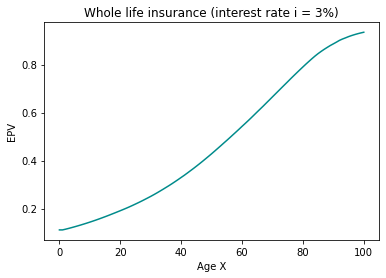

In [54]:
plt.plot(age,EPV,color = "darkcyan")
plt.xlabel("Age X")            
plt.ylabel("EPV" )
plt.title("Whole life insurance (interest rate i = 3%)")
plt.show()

### Grafique la función para una tasa  de 0 a 0.1 con saltos 0.001 y edad 20

In [55]:
tasa = pd.Series(range(0,101,1)) /1000
tasa
age = 20

In [56]:
EPV= pd.Series([whole_life(age,i,life_table) for i in tasa])
print (EPV)

0      1.000000
1      0.942831
2      0.889140
3      0.838707
4      0.791324
         ...   
96     0.015000
97     0.014624
98     0.014262
99     0.013915
100    0.013581
Length: 101, dtype: float64


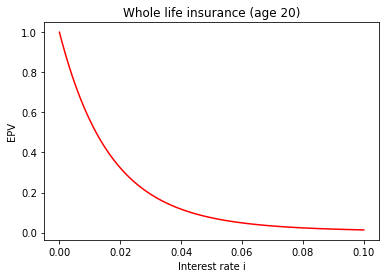

In [57]:
plt.plot(tasa,EPV,color = "red")
plt.xlabel("Interest rate i")            
plt.ylabel("EPV" )
plt.title("Whole life insurance (age 20)")
plt.show()

###  Caso 06
Construya una función que calcule el EPV de un **seguro de vida temporal**, tomando como insumos la edad, temporalidad, tasas interes y tabla de mortalidad.

In [58]:
def temp_life(age,n,i,life_table):
    qx = life_table.qx
    px = 1- qx
    
    kpx = pd.concat( [pd.Series(1), np.cumprod(px[age:age+n-1])  ] ,ignore_index= True ) 
    
    qxs = (qx[age:age+n])
    qxs.reset_index(inplace=True,drop = True)
    
    kqx = kpx*qxs
    
    per = len(kpx)
    exp = pd.Series(range(1,per+1))
    discount_factor =  (1 + i)**-(exp)

    return sum(discount_factor * kqx)

In [59]:
 temp_life(20, 45, 0.02, life_table)   

0.07466834487388643

###  Caso 07
Construya una función que calcule el EPV de un **seguro de vida entera diferido**, tomando como insumos la edad, per diferidos, tasas interes y tabla de mortalidad.

In [60]:
def dif_life(age,u,i,life_table):
    qx = life_table.qx
    px = 1- qx
    
    kpx = pd.concat( [pd.Series(1), np.cumprod(px[age:len(px)-1])  ] ,ignore_index= True ) 
    
    qxs = (qx[(age):len(qx)])
    qxs.reset_index(inplace=True,drop = True)
    
    kqx = kpx*qxs
    
    per = len(kpx)
    exp = pd.Series(range(1,per+1))
    discount_factor =  (1 + i)**-(exp)

    benefits = pd.Series([0]*u + [1]*(len(kpx)-u) )
    return sum(benefits*discount_factor * kqx)

In [61]:
dif_life(20 , 45 , 0.02, life_table) 

0.2484093183347561

### Beneficios combinados

### Seguros de capital
$A_{x:n}$ se paga al final de la muerte si ocurre entre $0$ y $n$  o si **está vivo** en el momento $n$
![](imagenes/07.png)


### Caso 08
Sr X tiene 35 años.   
Quiere ahorrar dinero para enviar a su bebé a la Facultad. Necesita 75.000 PEN cuando él cumpla 18 años.   
Al mismo tiempo, quiere cubrir su vida. La suma asegurada es de 50.000 PEN.
**¿Puedes diseñar este tipo de póliza de seguro de vida?**
![](imagenes/08.png)

In [62]:
# seguro vida x 18 años  y componene de ahorro al final
i = 0.03
age = 35
kpx = pd.concat([pd.Series(1), np.cumprod( px[age:age + 18 -1] ) ] ,ignore_index= True )   
kpx

0     1.000000
1     0.998840
2     0.997801
3     0.996823
4     0.995617
5     0.994482
6     0.992742
7     0.991441
8     0.989954
9     0.987954
10    0.986058
11    0.983957
12    0.981635
13    0.979299
14    0.976420
15    0.973266
16    0.970035
17    0.966446
dtype: float64

In [63]:
qxs = (qx[age:age+18])
qxs.reset_index(inplace=True,drop = True)
    
kqx = kpx*qxs
kqx

0     0.001160
1     0.001039
2     0.000978
3     0.001206
4     0.001135
5     0.001740
6     0.001300
7     0.001487
8     0.002000
9     0.001897
10    0.002100
11    0.002322
12    0.002336
13    0.002879
14    0.003154
15    0.003231
16    0.003589
17    0.004359
dtype: float64

In [64]:
per = len(kpx)
exp = pd.Series(range(1,per+1))

discount_factor =  (1 + i)**-(exp)
discount_factor


0     0.970874
1     0.942596
2     0.915142
3     0.888487
4     0.862609
5     0.837484
6     0.813092
7     0.789409
8     0.766417
9     0.744094
10    0.722421
11    0.701380
12    0.680951
13    0.661118
14    0.641862
15    0.623167
16    0.605016
17    0.587395
dtype: float64

In [68]:
benefits = pd.Series([50000]*len(kqx))
benefits

0     50000
1     50000
2     50000
3     50000
4     50000
5     50000
6     50000
7     50000
8     50000
9     50000
10    50000
11    50000
12    50000
13    50000
14    50000
15    50000
16    50000
17    50000
dtype: int64

In [69]:
EPV_death_benefits = sum(benefits*discount_factor*kqx)  
EPV_death_benefits

1354.6979194563246

In [70]:
EPV_pure_endowment = 75000*(1+i)**-18 * np.prod(px[age:age + 18])   
EPV_pure_endowment

42384.34816799867

In [71]:
#premiums patter rho
exp = pd.Series(range(per))
discount_factor =  (1 + i)**-(exp)
discount_factor

0     1.000000
1     0.970874
2     0.942596
3     0.915142
4     0.888487
5     0.862609
6     0.837484
7     0.813092
8     0.789409
9     0.766417
10    0.744094
11    0.722421
12    0.701380
13    0.680951
14    0.661118
15    0.641862
16    0.623167
17    0.605016
dtype: float64

In [72]:
rho = pd.Series([1]*len(kpx))
rho

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
dtype: int64

In [73]:
EPV_rho  = sum(rho*discount_factor*kpx)                      
EPV_rho

14.000494711733909

In [74]:
# Actuarial equivalence
# premium level
result = (EPV_death_benefits+EPV_pure_endowment)/EPV_rho   
result

3124.1071824981304

### Caso 09 

Una persona de (48) quiere asegurar una prestación de 40.000 PEN por fallecimiento entre los 55 y los 75 años. 
Adicionalmente 80.000 PEN cuando cumpla 75 años.
tasa de interés 5%


In [75]:
i = 0.05
age = 48
kpx = pd.concat([pd.Series(1), np.cumprod( px[age:74] ) ] ,ignore_index= True )   
kpx

0     1.000000
1     0.997060
2     0.993839
3     0.990540
4     0.986875
5     0.982424
6     0.977826
7     0.972077
8     0.966128
9     0.959819
10    0.952447
11    0.944628
12    0.936523
13    0.926708
14    0.916514
15    0.905901
16    0.894985
17    0.883046
18    0.869650
19    0.855110
20    0.840624
21    0.824484
22    0.807623
23    0.789161
24    0.769432
25    0.748634
26    0.726041
dtype: float64

In [76]:
qxs = (qx[age:75])
qxs.reset_index(inplace=True,drop = True)
    
kqx = kpx*qxs
kqx

0     0.002940
1     0.003221
2     0.003300
3     0.003665
4     0.004451
5     0.004598
6     0.005750
7     0.005949
8     0.006309
9     0.007371
10    0.007820
11    0.008105
12    0.009815
13    0.010194
14    0.010613
15    0.010916
16    0.011939
17    0.013396
18    0.014541
19    0.014486
20    0.016140
21    0.016861
22    0.018462
23    0.019729
24    0.020798
25    0.022594
26    0.023952
dtype: float64

In [77]:
per = len(kpx)
exp = pd.Series(range(1,per+1))
discount_factor =  (1 + i)**-(exp)
discount_factor


0     0.952381
1     0.907029
2     0.863838
3     0.822702
4     0.783526
5     0.746215
6     0.710681
7     0.676839
8     0.644609
9     0.613913
10    0.584679
11    0.556837
12    0.530321
13    0.505068
14    0.481017
15    0.458112
16    0.436297
17    0.415521
18    0.395734
19    0.376889
20    0.358942
21    0.341850
22    0.325571
23    0.310068
24    0.295303
25    0.281241
26    0.267848
dtype: float64

In [78]:
benefits = pd.Series([0]*7 + [40000]*(len(kqx)-7))
benefits

0         0
1         0
2         0
3         0
4         0
5         0
6         0
7     40000
8     40000
9     40000
10    40000
11    40000
12    40000
13    40000
14    40000
15    40000
16    40000
17    40000
18    40000
19    40000
20    40000
21    40000
22    40000
23    40000
24    40000
25    40000
26    40000
dtype: int64

In [79]:
EPV_death_benefits = sum(benefits*kqx*discount_factor)
EPV_death_benefits

4269.95412925505

In [80]:
EPV_pure_endowment = 80000*(1+i)**- 27 * np.prod(px[age:75])   
EPV_pure_endowment

15044.256901118222

In [81]:
# Premium pattern
#premiums patter rho

exp = pd.Series(range(per))
discount_factor =  (1 + i)**-(exp)
discount_factor

0     1.000000
1     0.952381
2     0.907029
3     0.863838
4     0.822702
5     0.783526
6     0.746215
7     0.710681
8     0.676839
9     0.644609
10    0.613913
11    0.584679
12    0.556837
13    0.530321
14    0.505068
15    0.481017
16    0.458112
17    0.436297
18    0.415521
19    0.395734
20    0.376889
21    0.358942
22    0.341850
23    0.325571
24    0.310068
25    0.295303
26    0.281241
dtype: float64

In [84]:
rho = pd.Series([1]*len(kpx))
print(rho)
EPV_rho  = sum(rho*discount_factor*kpx)                      
EPV_rho

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
20    1
21    1
22    1
23    1
24    1
25    1
26    1
dtype: int64


14.33474678677672

In [85]:
# Premium level
resultado = (EPV_pure_endowment+ EPV_death_benefits) /EPV_rho
resultado

1347.3702268804586

#### <span style='color:midnightblue'>  Edwin Fernandez - BLID
<span style='color:midnightblue'> Python para Actuarios Vida  </span>
***